<a href="https://colab.research.google.com/github/ashikin0112/ETL/blob/main/Chinook_Music_Store_ETL_and_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Data Collection**

In [ ]:
!pip install requests

In [ ]:
import requests
import os

# URL of the SQLite database to download
url = "https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip"

# Directory to save the downloaded file
download_dir = "/content"

# Filename to save the downloaded file
filename = os.path.join(download_dir, "chinook.zip")

# Send a GET request to the URL to download the file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the contents of the response to the file
    with open(filename, 'wb') as f:
        f.write(response.content)
    print("Downloaded successfully:", filename)
else:
    print("Failed to download:", response.status_code)

Downloaded successfully: /content/chinook.zip


In [ ]:
!unzip -o /content/chinook.zip -d /content/chinook

Archive:  /content/chinook.zip
  inflating: /content/chinook/chinook.db  


In [ ]:
!ls /content/chinook

chinook.db


In [ ]:
import pandas as pd
import sqlite3

In [ ]:
conn = sqlite3.connect('/content/chinook/chinook.db')
c = conn.cursor()

In [ ]:
def sq(str,con=conn):
    return pd.read_sql('''{}'''.format(str), con)

In [ ]:
tables = sq(
    '''select *
    from sqlite_master
    where type='table';'''
    ,conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=71ab73670e7c5d6968a29951fb6789800c41fe557a302587d8e404e11af5f076
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import sqlite3
import pandas as pd
from pandasql import sqldf

# Connect to SQLite database
conn = sqlite3.connect('/content/chinook/chinook.db')

# Define query to retrieve schema information of the table
schema_query = "PRAGMA table_info(tracks)"

# Execute the query and load results into a DataFrame
schema_df = pd.read_sql_query(schema_query, conn)

# Close connection
#conn.close()

# Display the DataFrame to view the schema information
print(schema_df)

   cid          name           type  notnull dflt_value  pk
0    0       TrackId        INTEGER        1       None   1
1    1          Name  NVARCHAR(200)        1       None   0
2    2       AlbumId        INTEGER        0       None   0
3    3   MediaTypeId        INTEGER        1       None   0
4    4       GenreId        INTEGER        0       None   0
5    5      Composer  NVARCHAR(220)        0       None   0
6    6  Milliseconds        INTEGER        1       None   0
7    7         Bytes        INTEGER        0       None   0
8    8     UnitPrice  NUMERIC(10,2)        1       None   0


In [ ]:
import sqlite3
import pandas as pd
from pandasql import sqldf

# Connect to SQLite database
conn = sqlite3.connect('/content/chinook/chinook.db')

# Define query to retrieve schema information of the table
schema_query = "PRAGMA table_info(media_types)"

# Execute the query and load results into a DataFrame
schema_df = pd.read_sql_query(schema_query, conn)

# Close connection
#conn.close()

# Display the DataFrame to view the schema information
print(schema_df)

   cid         name           type  notnull dflt_value  pk
0    0  MediaTypeId        INTEGER        1       None   1
1    1         Name  NVARCHAR(120)        0       None   0


In [ ]:
# Join Track and MediaType
sq('''select
t.name as track_name ,
t.Composer,
Milliseconds as duration_in_ms,
t.UnitPrice ,
m.Name as media_type
from tracks as t
join media_types as m
''')

,track_name,Composer,duration_in_ms,UnitPrice,media_type
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,0.99,MPEG audio file
1,Balls to the Wall,None,342562,0.99,MPEG audio file
2,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,0.99,MPEG audio file
3,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,0.99,MPEG audio file
4,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,375418,0.99,MPEG audio file
...,...,...,...,...,...
17510,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,0.99,AAC audio file
17511,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,0.99,AAC audio file
17512,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,0.99,AAC audio file
17513,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,0.99,AAC audio file


**Part 2: Transformation**

**Retrieves specific information about tracks with their name and associated media types.**

The addition of new 'track_media_type' transformed table. This transformation involves combining information from two separate tables (tracks and media_types) into a new table.

In [ ]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('/content/chinook/chinook.db')

# SQL query
query = '''
    SELECT
        t.name AS track_name,
        t.Composer,
        Milliseconds AS duration_in_ms,
        t.UnitPrice,
        m.Name AS media_type
    FROM tracks AS t
    JOIN media_types AS m
    ON t.MediaTypeId = m.MediaTypeId
'''

# Execute the query and load results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
#conn.close()

# Display the DataFrame
print(df)

conn = sqlite3.connect('/content/chinook/chinook.db')
df.to_sql('track_media_type', conn, index=False)

                                             track_name  \
0               For Those About To Rock (We Salute You)   
1                                 Put The Finger On You   
2                                       Let's Get It Up   
3                                      Inject The Venom   
4                                            Snowballed   
...                                                 ...   
3498                                         Love Comes   
3499                                      Muita Bobeira   
3500                                        OAM's Blues   
3501                                    One Step Beyond   
3502  Symphony No. 3 in E-flat major, Op. 55, "Eroic...   

                                               Composer  duration_in_ms  \
0             Angus Young, Malcolm Young, Brian Johnson          343719   
1             Angus Young, Malcolm Young, Brian Johnson          205662   
2             Angus Young, Malcolm Young, Brian Johnson          2

3503

**Part 3: Loading**

In [ ]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('/content/chinook/chinook.db')

# Define the SQL command to add a primary key constraint to the 'id' column
alter_table_query = '''
    PRAGMA foreign_keys=off;
    BEGIN TRANSACTION;
    ALTER TABLE track_media_type RENAME TO tmp_table;
    CREATE TABLE track_media_type (
        track_media_type_id INTEGER PRIMARY KEY,
        track_name NVARCHAR(200),
        Composer NVARCHAR(200),
        duration_in_ms INTEGER,
        UnitPrice NUMERIC(10,2),
        media_type_name NVARCHAR(120)
    );
    INSERT INTO track_media_type
        SELECT NULL, track_name, Composer, duration_in_ms, UnitPrice, media_type
        FROM tmp_table;
    DROP TABLE tmp_table;
    COMMIT TRANSACTION;
    PRAGMA foreign_keys=on;
'''

# Execute the SQL command
conn.executescript(alter_table_query)

# Retrieve the data from the modified table into a DataFrame
df = pd.read_sql_query("SELECT * FROM track_media_type", conn)

# Close connection
#conn.close()

# Print the DataFrame
print(df)

      track_media_type_id                                         track_name  \
0                       1            For Those About To Rock (We Salute You)   
1                       2                              Put The Finger On You   
2                       3                                    Let's Get It Up   
3                       4                                   Inject The Venom   
4                       5                                         Snowballed   
...                   ...                                                ...   
3498                 3499                                         Love Comes   
3499                 3500                                      Muita Bobeira   
3500                 3501                                        OAM's Blues   
3501                 3502                                    One Step Beyond   
3502                 3503  Symphony No. 3 in E-flat major, Op. 55, "Eroic...   

                                       

In [ ]:
import sqlite3
import pandas as pd
from pandasql import sqldf

# Connect to SQLite database
conn = sqlite3.connect('/content/chinook/chinook.db')

# Define query to retrieve schema information of the table
schema_query = "PRAGMA table_info(track_media_type)"

# Execute the query and load results into a DataFrame
schema_df = pd.read_sql_query(schema_query, conn)

# Close connection
#conn.close()

# Display the DataFrame to view the schema information
print(schema_df)

   cid                 name           type  notnull dflt_value  pk
0    0  track_media_type_id        INTEGER        0       None   1
1    1           track_name  NVARCHAR(200)        0       None   0
2    2             Composer  NVARCHAR(200)        0       None   0
3    3       duration_in_ms        INTEGER        0       None   0
4    4            UnitPrice  NUMERIC(10,2)        0       None   0
5    5      media_type_name  NVARCHAR(120)        0       None   0


**Part 4: Data Modeling**

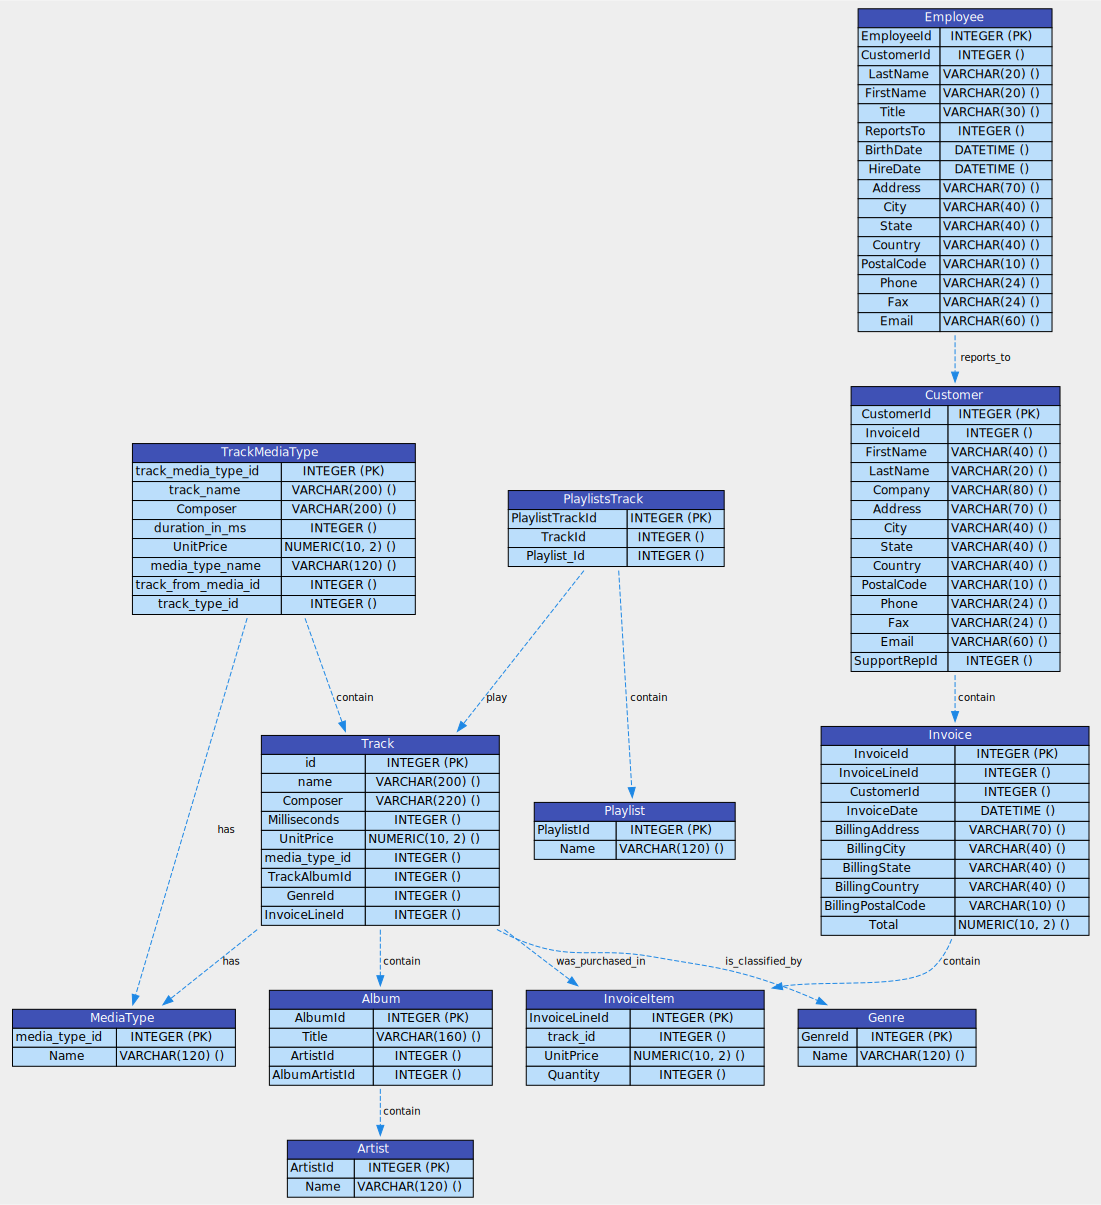

In [20]:
from IPython.core.display import SVG
from datetime import datetime
from typing import Optional
from enum import Enum
from decimal import Decimal
from sqlalchemy.orm import sessionmaker, declarative_base, relationship
from sqlalchemy import Column, String, DateTime, Integer, Numeric, Boolean, JSON, ForeignKey, LargeBinary, Text, UniqueConstraint, CheckConstraint, text as sql_text
from sqlalchemy.ext.asyncio import create_async_engine, AsyncSession
from sqlalchemy import inspect
import graphviz
from lxml import etree
import os
import re
Base = declarative_base()


def generate_data_model_diagram(models, output_file='my_data_model_diagram'):
    # Initialize graph with more advanced visual settings
    dot = graphviz.Digraph(comment='Interactive Data Models', format='svg',
                            graph_attr={'bgcolor': '#EEEEEE', 'rankdir': 'TB', 'splines': 'spline'},
                            node_attr={'shape': 'none', 'fontsize': '12', 'fontname': 'Roboto'},
                            edge_attr={'fontsize': '10', 'fontname': 'Roboto'})

    # Iterate through each SQLAlchemy model
    for model in models:
        insp = inspect(model)
        name = insp.class_.__name__

        # Create an HTML-like label for each model as a rich table
        label = f'''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
        <TR><TD COLSPAN="2" BGCOLOR="#3F51B5"><FONT COLOR="white">{name}</FONT></TD></TR>
        '''

        for column in insp.columns:
            constraints = []
            if column.primary_key:
                constraints.append("PK")
            if column.unique:
                constraints.append("Unique")
            if column.index:
                constraints.append("Index")

            constraint_str = ','.join(constraints)
            color = "#BBDEFB"

            label += f'''<TR>
                         <TD BGCOLOR="{color}">{column.name}</TD>
                         <TD BGCOLOR="{color}">{column.type} ({constraint_str})</TD>
                         </TR>'''

        label += '</TABLE>>'

        # Create the node with added hyperlink to detailed documentation
        dot.node(name, label=label, URL=f"http://{name}_details.html")

        # Add relationships with tooltips and advanced styling
        for rel in insp.relationships:
            target_name = rel.mapper.class_.__name__
            tooltip = f"Relation between {name} and {target_name}"
            dot.edge(name, target_name, label=rel.key, tooltip=tooltip, color="#1E88E5", style="dashed")

        # Add arrows from Track and MediaType to TrackMediaType
        #if name == 'Track' or name == 'MediaType':
            #dot.edge(name, 'TrackMediaType', tooltip=f"Relation from {name} to TrackMediaType", color="#1E88E5", style="dashed")


    # Render the graph to a file and open it
    dot.render(output_file, view=True)


def add_web_font_and_interactivity(input_svg_file, output_svg_file):
    if not os.path.exists(input_svg_file):
        print(f"Error: {input_svg_file} does not exist.")
        return

    parser = etree.XMLParser(remove_blank_text=True)
    try:
        tree = etree.parse(input_svg_file, parser)
    except etree.XMLSyntaxError as e:
        print(f"Error parsing SVG: {e}")
        return

    root = tree.getroot()

    style_elem = etree.Element("style")
    style_elem.text = '''
    @import url("https://fonts.googleapis.com/css?family=Roboto:400,400i,700,700i");
    '''
    root.insert(0, style_elem)

    for elem in root.iter():
        if 'node' in elem.attrib.get('class', ''):
            elem.attrib['class'] = 'table-hover'
        if 'edge' in elem.attrib.get('class', ''):
            source = elem.attrib.get('source')
            target = elem.attrib.get('target')
            elem.attrib['class'] = f'edge-hover edge-from-{source} edge-to-{target}'

    tree.write(output_svg_file, pretty_print=True, xml_declaration=True, encoding='utf-8')

# ________________________________________________________________


# [Sqlalchemy data model classes as below:]

class Album(Base):
    __tablename__ = 'albums'
    AlbumId = Column(Integer, primary_key=True)
    Title = Column(String(length=160))
    ArtistId = Column(Integer)

    AlbumArtistId =  Column(Integer, ForeignKey('artists.ArtistId'))

    #Album class include a many-to-one relationship with Artist class
    contain = relationship('Artist')

class Artist(Base):
    __tablename__ = 'artists'
    ArtistId = Column(Integer, primary_key=True)
    Name = Column(String(length=120))

class Employee(Base):
    __tablename__ = 'employees'
    EmployeeId = Column(Integer,primary_key=True)
    CustomerId = Column(Integer, ForeignKey('customers.CustomerId'))
    LastName = Column(String(length=20))
    FirstName = Column(String(length=20))
    Title = Column(String(length=30))
    ReportsTo = Column(Integer)
    BirthDate = Column(DateTime, default=datetime.utcnow)
    HireDate = Column(DateTime, default=datetime.utcnow)
    Address = Column(String(length=70))
    City = Column(String(length=40))
    State = Column(String(length=40))
    Country = Column(String(length=40))
    PostalCode = Column(String(length=10))
    Phone = Column(String(length=24))
    Fax = Column((String(length=24)))
    Email = Column(String(length=60))

    #Employee class include a one-to-many relationship with Customer class
    reports_to = relationship("Customer")

class Customer(Base):
    __tablename__ = 'customers'
    CustomerId = Column(Integer, primary_key=True)
    InvoiceId = Column(Integer, ForeignKey('invoices.InvoiceId'))
    FirstName = Column(String(length=40))
    LastName = Column(String(length=20))
    Company = Column(String(length=80))
    Address = Column(String(length=70))
    City = Column(String(length=40))
    State = Column(String(length=40))
    Country = Column(String(length=40))
    PostalCode = Column(String(length=10))
    Phone = Column(String(length=24))
    Fax = Column(String(length=24))
    Email = Column(String(length=60))
    SupportRepId = Column(Integer)

    #Customer class include a one-to-many relationship with Invoice class
    contain = relationship("Invoice")

class Playlist(Base):
    __tablename__ = 'playlists'
    PlaylistId = Column(Integer, primary_key=True)
    Name = Column(String(length=120))

class PlaylistsTrack(Base):
    __tablename__ = 'playlist_track'
    PlaylistTrackId = Column(Integer, primary_key=True)
    TrackId = Column(Integer, ForeignKey('tracks.id'))
    Playlist_Id = Column(Integer, ForeignKey('playlists.PlaylistId'))

    #PlaylistTrack class include a many-to-one/many-to-many relationship with Track class
    play = relationship('Track')

    #PlaylistTrack class include a many-to-one/many-to-many relationship with Customer class
    contain = relationship('Playlist')

class Genre(Base):
    __tablename__ = 'genres'
    GenreId = Column(Integer, primary_key=True)
    Name = Column(String(length=120))

class Track(Base):
    __tablename__ = 'tracks'

    id = Column(Integer, primary_key=True)
    name = Column(String(length=200))
    Composer = Column(String(length=220))
    Milliseconds = Column(Integer)
    UnitPrice = Column(Numeric(10, 2))
    media_type_id = Column(Integer, ForeignKey('media_types.media_type_id'))
    TrackAlbumId =  Column(Integer, ForeignKey('albums.AlbumId'))
    GenreId = Column(Integer, ForeignKey('genres.GenreId'))
    InvoiceLineId = Column(Integer, ForeignKey('invoice_items.InvoiceLineId'))

     #Track class include a many-to-one relationship with MediaType class
    has = relationship('MediaType')

     #Track class include a many-to-one relationship with Album class
    contain = relationship('Album')

    #Track class include a many-to-one relationship with Genre class
    is_classified_by = relationship('Genre')

    #Track class include a many-to-one relationship with InvoiceItem class
    was_purchased_in = relationship("InvoiceItem")

class Invoice(Base):
    __tablename__ = 'invoices'
    InvoiceId = Column(Integer, primary_key=True)
    InvoiceLineId= Column(Integer, ForeignKey('invoice_items.InvoiceLineId'))
    CustomerId = Column(Integer)
    InvoiceDate = Column(DateTime, default=datetime.utcnow)
    BillingAddress = Column(String(length=70))
    BillingCity = Column(String(length=40))
    BillingState = Column(String(length=40))
    BillingCountry = Column(String(length=40))
    BillingPostalCode = Column(String(length=10))
    Total = Column(Numeric(10, 2))

    #Invoice class include a one-to-many relationship with InvoiceItem class
    contain = relationship("InvoiceItem")

class InvoiceItem(Base):
    __tablename__ = 'invoice_items'
    InvoiceLineId = Column(Integer, primary_key=True)
    track_id = Column(Integer, ForeignKey('Track.id'))
    UnitPrice = Column(Numeric(10, 2))
    Quantity = Column(Integer)

class MediaType(Base):
    __tablename__ = 'media_types'

    media_type_id = Column(Integer, primary_key=True)
    Name = Column(String(length=120))

#New Transformed Table defined as TrackMediaType class
class TrackMediaType(Base):
    __tablename__ = 'track_media_type'

    track_media_type_id = Column(Integer, primary_key=True)
    track_name = Column(String(length=200))
    Composer = Column(String(length=200))
    duration_in_ms = Column(Integer)
    UnitPrice = Column(Numeric(10, 2))
    media_type_name = Column(String(length=120))
    track_from_media_id  = Column(Integer, ForeignKey('media_types.media_type_id'))
    track_type_id=  Column(Integer, ForeignKey('tracks.id'))

    #TrackMediaType class include a one-to-many relationship with MediaType class
    has = relationship('MediaType')

    #TrackMediaType class include a one-to-many relationship with Track class
    contain = relationship('Track')

models = [Track, MediaType, TrackMediaType, Album, Artist, Playlist, PlaylistsTrack, Genre, Invoice, InvoiceItem, Customer,Employee]

output_file_name = 'my_data_model_diagram'

# Generate the diagram and add interactivity
generate_data_model_diagram(models, output_file_name)
add_web_font_and_interactivity('my_data_model_diagram.svg', 'my_interactive_data_model_diagram.svg')

# Display the SVG file
display(SVG(filename='my_interactive_data_model_diagram.svg'))

**Part 5: Visualization**

In [21]:
import plotly.express as px

# df to plot the distribution of 'media_type_name'
media_type_counts = df['media_type_name'].value_counts().reset_index()
media_type_counts.columns = ['media_type_name', 'count']

# Create the bar chart using Plotly Express with different colors for each media type
fig = px.bar(media_type_counts, x='count', y='media_type_name',
             title="Total of Media Type Name for All Tracks",
             labels={'media_type_name': 'Media Type Name', 'count': 'Count'},
             color='media_type_name')  # Specify the column for color

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# df to plot the distribution of 'media_type_name'
media_type_counts = df['media_type_name'].value_counts().reset_index()
media_type_counts.columns = ['media_type_name', 'count']

# Create the pie chart using Plotly Express
fig = px.pie(media_type_counts, values='count', names='media_type_name',
             title="Total of Media Type Name for All Tracks",
             labels={'media_type_name': 'Media Type Name', 'count': 'Count'})

# Show the plot
fig.show()

In [ ]:
#conn.close()